# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
#!pip3 install wldhx.yadisk-direct

In [2]:
#!curl -L $(yadisk-direct https://disk.yandex.ru/d/G5rq-R3AK8SOuw) -o depression_data.tsv

In [7]:
import pandas as pd

df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [8]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [9]:
df[df["age"].between(14, 50, inclusive=True)]['age'].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [10]:
my_df = df[df["age"].between(16, 26, inclusive=True)]
len(my_df[my_df['age']==16])/len(my_df)

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [11]:
len(df[(df['age']==28)|(df['age']==30)])

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [12]:
my_df = df[df["age"].between(18, 30, inclusive=True)]
my_df['age'].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [13]:
df.groupby("label").count()

,text,age
label,,
0,32021,0
1,32018,24325


In [14]:
df["label"].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [16]:
from razdel import sentenize


def get_num_sentences(text):
    segmented_sentences = sentenize(text)
    num_sentences = len(list(segmented_sentences))
    return num_sentences

df['num_sentences'] = [get_num_sentences(text) for text in df['text']]

2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [13]:
#!pip install natasha

In [18]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [19]:
from razdel import tokenize
import string

stopwords_ru = stopwords.words("russian")

def is_sw(x, stopwords=stopwords_ru):
  if x in stopwords_ru:
    return False
  if x in string.punctuation:
    return False
  else:
    return True


def get_tokens(text):
    tokenized_text = tokenize(text)
    return [t.text for t in tokenized_text if is_sw(t.text)]


def get_tokens_num(text):
    tokenized_text = tokenize(text)
    tokenized_text_wo_sw = [t.text for t in tokenized_text if is_sw(t.text)]
    num_tokens = len(list(tokenized_text_wo_sw))
    return num_tokens

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [20]:
df['num_tokens'] = df['text'].apply(get_tokens_num)

In [21]:
df.to_csv('depression_data_add.csv')

In [22]:
df['num_tokens'].mean()

119.77477786973563

In [23]:
df[['num_tokens', 'label']].groupby("label").mean()

,num_tokens
label,
0,160.671434
1,78.874289


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [24]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
#!mkdir /root/.local/bin
!cp mystem /root/.local/bin/mystem

--2020-10-22 14:24:20--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.245, 5.45.205.244, 5.45.205.242, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.245|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-mskstoredata09.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2020-10-22 14:24:21--  http://cache-mskstoredata09.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-mskstoredata09.cdn.yandex.net (cache-mskstoredata09.cdn.yandex.net)... 37.9.96.20, 2a02:6b8:0:3706::18
Connecting to cache-mskstoredata09.cdn.yandex.net (cache-mskstoredata09.cdn.yandex.net)|37.9.96.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.3’

mystem-

In [76]:
#эта лемматизация работает быстрее, чем pymorphy и прочее за счёт соединения
#набора текстов в 1 гиппертекст и лемматизации его
#идея взята из этого обсуждения на хабре: https://habr.com/ru/post/503420/
from pymystem3 import Mystem
import numpy as np

mystem = Mystem()
def my_lemmatize(texts, mystem=mystem):
    lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
    txtpart = lol(texts, 1000)
    res = []
    for txtp in txtpart:
        alltexts = ' '.join([txt + ' brf ' for txt in txtp])
        words = mystem.lemmatize(alltexts)
        doc = []
        for txt in words:
            if txt != '\n' and txt.strip() != '':
                if txt == 'brf':
                    res.append(doc)
                    doc = []
                else:
                    doc.append(txt)
    return res

In [32]:
text = ['мама мыла раму']

my_lemmatize(text)

[['мама', 'мыть', 'рама']]

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [56]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

def pos_tags(text, morph=morph):
    tokens = get_tokens(text)
    analyses = [morph.parse(word) for word in tokens]
    pos_tags = [a[0].tag.POS for a in analyses]
    return pos_tags

In [57]:
text = 'мама мыла раму, а папа курил бамбук'
pos_tags(text)

['NOUN', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'NOUN']

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

Мы хотим избавиться от слов, которые не вносят много дополнительного смысла в тексты, чтобы облегчить хранение и обработку данных. Обычно стоп-слова – это частотные слова. Действительно, если слово есть почти в любом тексте, то для различения этих текстов между собой большую роль такое слово не играет. В русском языке это обычно союзы,местоимения, частицы, предлоги

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

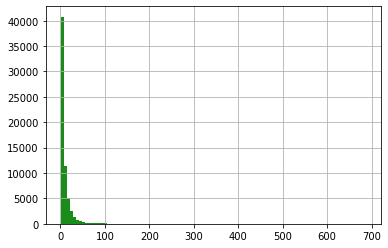

In [42]:
df['num_sentences'].hist(bins=100, alpha=0.9, color='g')

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

label
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

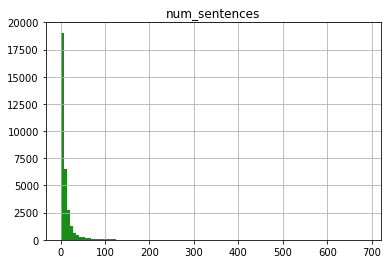

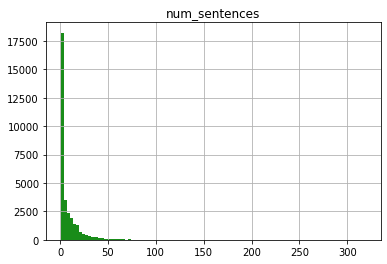

In [44]:
df[['label', 'num_sentences']].groupby("label").hist(bins=100, alpha=0.9, color='g')

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

Есть оч маленькая положительная корреляция, 

In [59]:
my_df = df[df["age"].between(16, 32, inclusive=True)][['age', 'num_sentences']]
my_df.corr()

,age,num_sentences
age,1.000000,0.039831
num_sentences,0.039831,1.000000


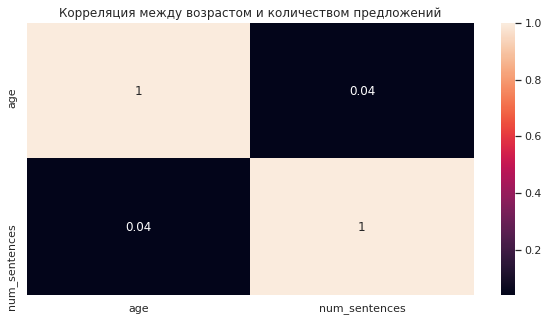

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=my_df.corr(), 
    annot=True,
    ax=ax
)

plt.title("Корреляция между возрастом и количеством предложений")
plt.show()

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [44]:
def char_ngrams(s, n):
  s = list(s)
  return [s[i:i+n] for i in range(len(s)-n+1)]

In [45]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

[['у', 'с', 'т'],
 ['с', 'т', 'а'],
 ['т', 'а', 'в'],
 ['а', 'в', 'ш'],
 ['в', 'ш', 'а'],
 ['ш', 'а', 'я'],
 ['а', 'я', ' '],
 ['я', ' ', 'м'],
 [' ', 'м', 'а'],
 ['м', 'а', 'м']]

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [46]:
def word_ngrams(s, n):
    s = s.split()
    return [s[i:i+n] for i in range(len(s)-n+1)]

In [117]:
# пример работы функции
word_ngrams(text, n=2)

[['мама', 'мыла'],
 ['мыла', 'раму,'],
 ['раму,', 'а'],
 ['а', 'папа'],
 ['папа', 'курил'],
 ['курил', 'бамбук']]

In [48]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [51]:
def lemma_ngrams(s, n):
    s = my_lemmatize([s])[0]
    return [s[i:i+n] for i in range(len(s)-n+1)]

In [52]:
# пример работы функции

lemma_ngrams(text, n=3)

[['уставать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рама']]

In [53]:
lemma_ngrams(text, n=4)

[['уставать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рама']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [54]:
def pos_ngrams(s, n):
    s = pos_tags(s)
    return [s[i:i+n] for i in range(len(s)-n+1)]

In [58]:
# пример работы функции

pos_ngrams(text, n=3)

[['NOUN', 'NOUN', 'NOUN'],
 ['NOUN', 'NOUN', 'NOUN'],
 ['NOUN', 'NOUN', 'VERB'],
 ['NOUN', 'VERB', 'NOUN']]

In [59]:
pos_ngrams(text, n=4)

[['NOUN', 'NOUN', 'NOUN', 'NOUN'],
 ['NOUN', 'NOUN', 'NOUN', 'VERB'],
 ['NOUN', 'NOUN', 'VERB', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [69]:
def build_pos_dict(corpus):
  all_tags = []
  for text in corpus:
    all_tags.extend(pos_tags(text))
  return {i:all_tags.count(i) for i in set(all_tags)}  

In [70]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [77]:
lemmas = my_lemmatize(df['text'])

In [78]:
df['lemmas'] = lemmas

In [81]:
def build_lemma_dict(lemmas_corpus):
  all_lemmas = []
  i = 0
  for text_lemmas in lemmas_corpus:
    i += 1
    if i%10==0:
      print(i*100/len(lemmas_))
    all_lemmas.extend(text_lemmas)
  return {i:all_lemmas.count(i) for i in set(all_lemmas)}  

In [ ]:
%%time 
#у меня коллаб тупить начинает, если считать на всех данных, так что посчитаю на части
df1 = df[df['label']==1]
df1_lemma_dict = build_lemma_dict(df1['lemmas'][:1000])

In [98]:
%%time 
df0 = df[df['label']==0]
df0_lemma_dict = build_lemma_dict(df0['lemmas'][:1000])

CPU times: user 3min 10s, sys: 16.5 ms, total: 3min 10s
Wall time: 3min 10s


In [ ]:
df0_lemma_dict

In [109]:
import operator
sorted_df1 = sorted(df1_lemma_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_df0 = sorted(df0_lemma_dict.items(), key=operator.itemgetter(1), reverse=True)
list1 = [i[0] for i in sorted_df1[:15]]
list0 = [i[0] for i in sorted_df0[:15]]
len(list(set(list1) & set(list0)))

8

In [116]:
#я не удаляла из лемм стоп-слова (но это, кажется, и не требовалось по тексту задания)
#но всё же возьмем побольше лемм ради интереса

sorted_df1 = sorted(df1_lemma_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_df0 = sorted(df0_lemma_dict.items(), key=operator.itemgetter(1), reverse=True)
list1 = [i[0] for i in sorted_df1[:100]]
list0 = [i[0] for i in sorted_df0[:100]]
common = list(set(list1) & set(list0))
common_wo_sp = [c for c in common if c not in stopwords_ru and c.strip(' ,.-!') not in string.punctuation]
common_wo_sp

['ребенок',
 'это',
 'работа',
 'весь',
 'человек',
 'каждый',
 'год',
 'свой',
 'становиться',
 'время',
 'день',
 'который']

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

Количество и тип знаков препинания, количество слов из определенного набора, вектора лемм, вектор каждого текста по отдельности. Для векторов можно использовать w2v или какие-нибудь новомодные трансформеры.